In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import algos
import features
import parametric
import policy
import chicken
from agents import OffPolicyAgent, OnPolicyAgent
from rlbench import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


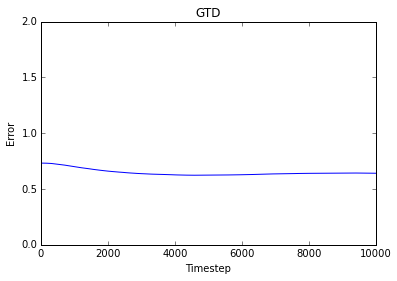

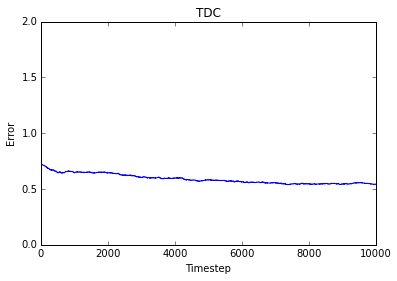

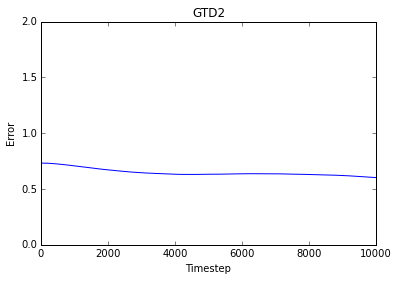

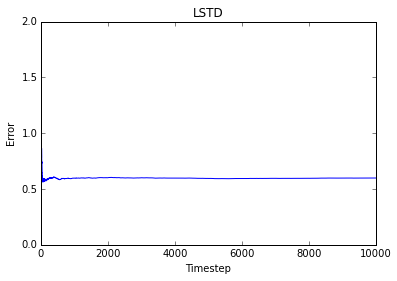

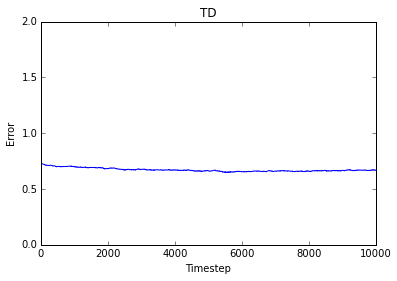

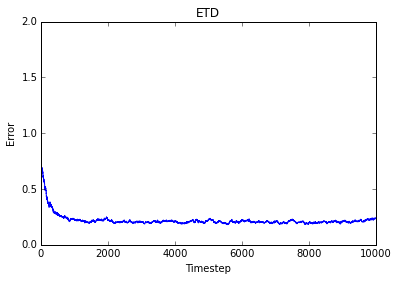

In [5]:
# define the experiment
num_states = 8
num_features = 6

# set up environment
env = chicken.Chicken(num_states)

# "true" values for states
true_values = {0: 0.4782968999999999, 
               1: 0.531441, 
               2: 0.5904899999999993, 
               3: 0.6560999999999992, 
               4: 0.7289999999999992, 
               5: 0.8099999999999997, 
               6: 0.8999999999999999, 
               7: 0.9999999999999998}

# set up algorithm parameters
state_gamma = {s: 0.9 for s in env.states}
state_gamma[0] = 0

f_gm = parametric.MapState(state_gamma)
f_gm_p = parametric.MapNextState(state_gamma)

update_params = {
    'alpha': 0.01,
    'beta': 0.001,
    'gm': f_gm,
    'gm_p': f_gm_p,
    'lm': 0.0,
    'lm_p': 0.0,
    'interest': 1.0,
}

# Define the target policy
pol_pi = policy.FixedPolicy({s: {0: 1} for s in env.states})
# Define the behavior policy
pol_mu = policy.FixedPolicy({s: {0: 1} if s < 4 else {0: 0.5, 1: 0.5} for s in env.states})

# set feature mapping
phi = features.RandomBinary(num_features, num_features // 2, random_seed=101011)
# phi = features.Int2Unary(num_states)


# Run all available algorithms 
max_steps = 10000
num_runs = 30
for name, alg in algos.algo_registry.items():    
    # Set up the agent, run the experiment, get state-values
    mse_lst = []
    for i in range(num_runs):
        agent = OffPolicyAgent(alg(phi.length), pol_pi, pol_mu, phi, update_params)
        run_mse_lst = run_errors(agent, env, max_steps, true_values)
        
#     mspbe_lst = run_errors(agent, env, max_steps, mspbe_values)

        mse_lst.append(run_mse_lst)
    mse_avg = np.mean(mse_lst, axis=0)
    # Plot the errors
    xdata = np.arange(max_steps)
    plt.plot(xdata, mse_avg)
#     plt.plot(xdata, mspbe_lst)
#     plt.plot(xdata, np.log(mse_lst))
#     plt.plot(xdata, np.log(mspbe_lst))
    
    # Format and label the graph
    plt.ylim(0, 2)
    plt.title(name)
    plt.xlabel('Timestep')
    plt.ylabel('Error')
    plt.show()

In [3]:
mse_avg.shape

(10000,)

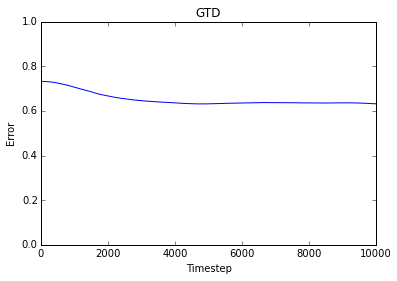

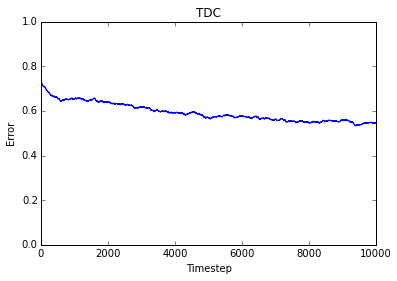

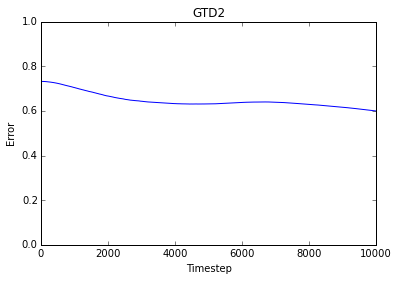

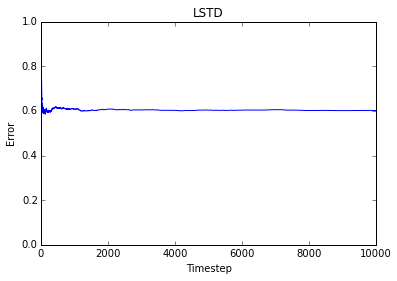

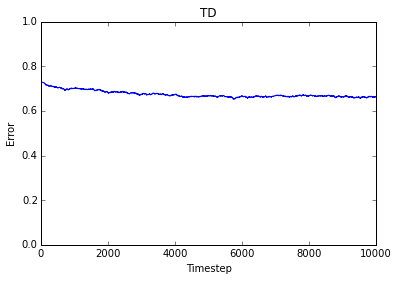

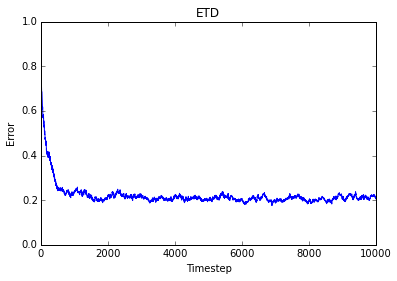

In [6]:
# define the experiment
num_states = 8
num_features = 6

# set up environment
env = chicken.Chicken(num_states)

# "true" values for states
true_values = {0: 0.4782968999999999, 
               1: 0.531441, 
               2: 0.5904899999999993, 
               3: 0.6560999999999992, 
               4: 0.7289999999999992, 
               5: 0.8099999999999997, 
               6: 0.8999999999999999, 
               7: 0.9999999999999998}

# set up algorithm parameters
state_gamma = {s: 0.9 for s in env.states}
state_gamma[0] = 0

f_gm = parametric.MapState(state_gamma)
f_gm_p = parametric.MapNextState(state_gamma)

update_params = {
    'alpha': 0.01,
    'beta': 0.001,
    'gm': f_gm,
    'gm_p': f_gm_p,
    'lm': 0.0,
    'lm_p': 0.0,
    'interest': 1.0,
}

# Define the target policy
pol_pi = policy.FixedPolicy({s: {0: 1} for s in env.states})
# Define the behavior policy
pol_mu = policy.FixedPolicy({s: {0: 1} if s < 4 else {0: 0.5, 1: 0.5} for s in env.states})

# set feature mapping
phi = features.RandomBinary(num_features, num_features // 2, random_seed=101011)
# phi = features.Int2Unary(num_states)


# Run all available algorithms 
max_steps = 10000
num_runs = 30
for name, alg in algos.algo_registry.items():    
    # Set up the agent, run the experiment, get state-values
    mse_lst = []
    for i in range(num_runs):
        agent = OffPolicyAgent(alg(phi.length), pol_pi, pol_mu, phi, update_params)
        run_mse_lst = run_errors(agent, env, max_steps, true_values)
        
#     mspbe_lst = run_errors(agent, env, max_steps, mspbe_values)

        mse_lst.append(run_mse_lst)
    mse_avg = np.mean(mse_lst, axis=0)
    # Plot the errors
    xdata = np.arange(max_steps)
    plt.plot(xdata, mse_avg)
#     plt.plot(xdata, mspbe_lst)
#     plt.plot(xdata, np.log(mse_lst))
#     plt.plot(xdata, np.log(mspbe_lst))
    
    # Format and label the graph
    plt.ylim(0, 1)
    plt.title(name)
    plt.xlabel('Timestep')
    plt.ylabel('Error')
    plt.show()